In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import folium as folium
import os

In [2]:
total= pd.read_csv("output/tot.csv")
tot = total["total records"][0]
print("The total number of records in the database is: {}.".format(tot))

The total number of records in the database is: 887383.


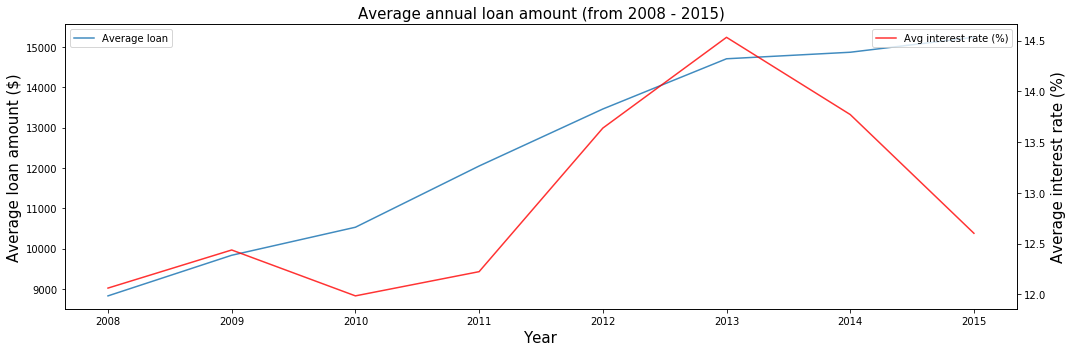

In [3]:
#average loan.
loan_month = pd.read_csv("output/avg-loan.csv")
xmonth = loan_month["loan_year"]
yavg_loan = loan_month["average_loan"]
month_cat = np.arange(len(xmonth))

#average interest.
int_month = pd.read_csv("output/avg-interest.csv")
yavg_int = int_month["interest_rate"]
month_cat = np.arange(len(xmonth))

#plot figure
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)

#figure for avg loan.
ax1.set_xlabel("Year",fontsize=15)
ax1.set_ylabel("Average loan amount ($)",fontsize=15)
ax1.set_title("Average annual loan amount (from 2008 - 2015)",fontsize=15)
ax1.plot(xmonth, yavg_loan, alpha=0.85, label="Average loan")

# #figure for avg interest.
ax2 = ax1.twinx()
ax2.set_ylabel("Average interest rate (%)",fontsize=15)
ax2.plot(xmonth, yavg_int, alpha=0.8, 
         label="Avg interest rate (%)",
         color="red")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

fig.tight_layout()
plt.show()

In [4]:
# # # #average installment.
# install = pd.read_csv("output/avg-installment.csv")
# install

# # lf = pd.DataFrame({'loan_amount': [1, 2, 3, 4], 'total': [100, 200, 150, 20]})
# xmonth = install["loan_year"]
# yavg_instal = install["installment"]
# month_cat = np.arange(len(xmonth))

# plt.plot(xmonth, yavg_instal, alpha=0.8, color="b")
# plt.xticks(month_cat, xmonth)
# plt.ylabel("Average installment ($)")
# plt.title("Average installment")
# plt.show()

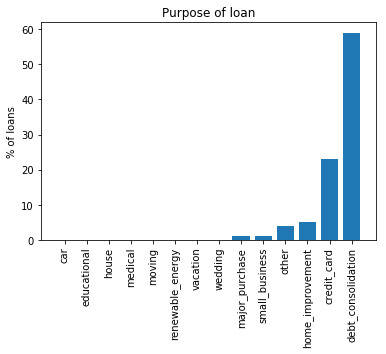

In [5]:
#purpose of loan
purpose = pd.read_csv("output/purpose.csv")
x_purpose = purpose["purpose"]
y_perct = purpose["Percentage"]
purpose_cat = np.arange(len(x_purpose))
plt.bar(x_purpose, y_perct)
plt.xticks(purpose_cat, x_purpose, rotation=90)
plt.ylabel("% of loans")
plt.title("Purpose of loan")
plt.show()

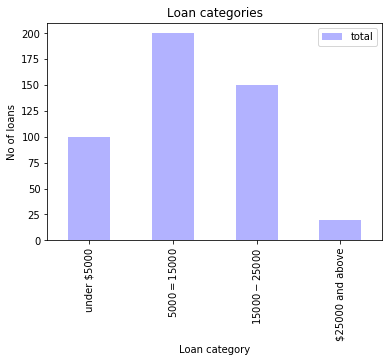

In [6]:
#loan amount categories
lf = pd.read_csv("output/loan-cat.csv")
lf = pd.DataFrame({"loan_amount": [1, 2, 3, 4], "total" : [100, 200, 150, 20]})
lf["loan_amount"] = lf["loan_amount"].replace({1: "under $5000", 2: "$5000 = $15000", 3: "$15000 - $25000", 4: "$25000 and above"})
lf.plot(kind="bar", x="loan_amount", y="total", color="b", alpha=0.3)

plt.xlabel('Loan category')
plt.ylabel('No of loans')
plt.title('Loan categories')
plt.show()

In [7]:
# status of loans
loan_type = pd.read_csv("output/loan-status.csv")
loan_type

,loan_status,No of loans
0,Does not meet the credit policy. Status:Charge...,761
1,Default,1219
2,Does not meet the credit policy. Status:Fully ...,1988
3,Late (16-30 days),2357
4,In Grace Period,6253
5,Issued,8460
6,Late (31-120 days),11591
7,Charged Off,45248
8,Fully Paid,207724
9,Current,601781


Given the above, loans will be categorized as follows: 1) good loans (this will be made up of fully paid loans).
2) bad loans (will consist of charged off loans. Remaining will not be taken into account as information is insufficient to determine which category they fall into.

In [8]:
#loan types we'll be looking at
loan_type = pd.read_csv("output/loan-status.csv")
loan_type = loan_type.drop([0, 1, 2, 3, 4, 5, 6, 9])
print("The loans that will be examined in this notebook are as follows:")
loan_type

The loans that will be examined in this notebook are as follows:


,loan_status,No of loans
7,Charged Off,45248
8,Fully Paid,207724


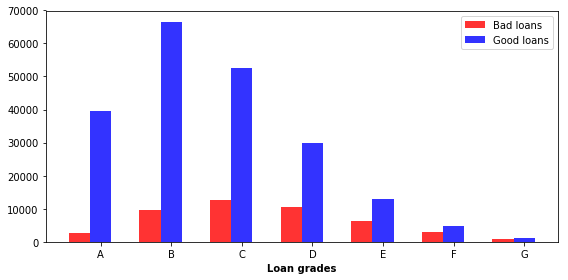

In [9]:
#good and bad loans by loan grade
lg = pd.read_csv("output/loans-grade.csv")
# loan_grade

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
xgrade = lg["grade"].drop_duplicates()
y_bad = lg[lg["loan_status"]== "Charged Off"]["loans number"]
y_good = lg[lg["loan_status"] == "Fully Paid"]["loans number"]

# Set position of bar on X axis
r1 = np.arange(len(xgrade))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
plt.bar(r2, y_good, color="b", alpha=0.8, width=barWidth, label="Good loans")
 
# Add xticks on the middle of the group bars
plt.xlabel("Loan grades", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(xgrade))], ["A", "B", "C", "D", "E", "F", "G"])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


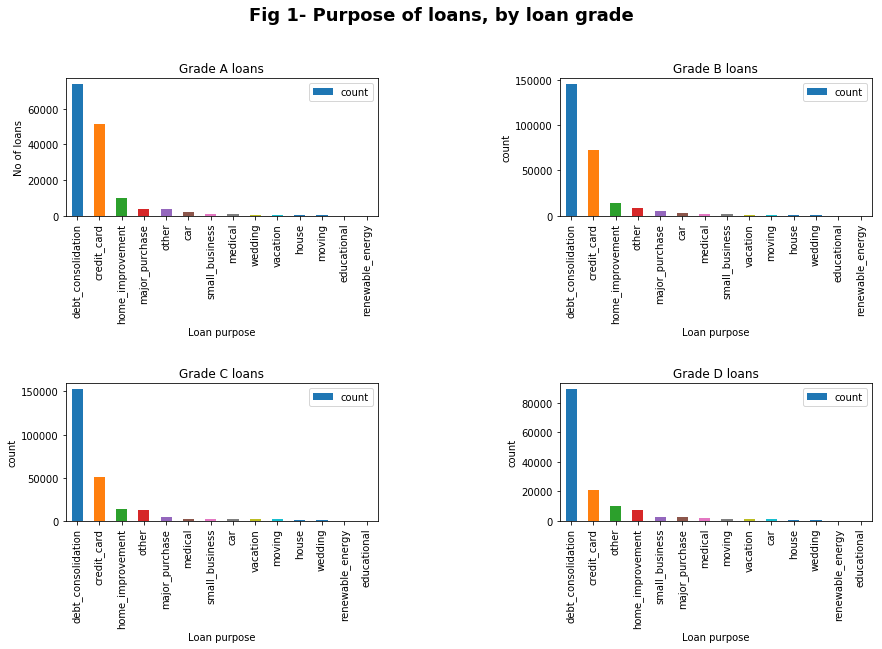

In [10]:
#Loan grade by purpose
#Setting up a figure to accomodate 4 grades given in the dataset. 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle("Fig 1- Purpose of loans, by loan grade", fontweight="bold", size=18)

#Grade A loans, by purpose.
gp_a = pd.read_csv("output/grade-a-purpose.csv")
gp_a.plot(kind="bar", ax=axes[0,0], x="purpose", y="count")
axes[0,0].set_title("Grade A loans")
axes[0,0].set_xlabel("Loan purpose")
axes[0,0].set_ylabel("No of loans")

#Grade B loans, by purpose.
gp_b = pd.read_csv("output/grade-b-purpose.csv")
gp_b.plot(kind="bar", ax=axes[0,1], x="purpose", y="count")
axes[0,1].set_title("Grade B loans")
axes[0,1].set_xlabel("Loan purpose")
axes[0,1].set_ylabel("count")

#Grade C loans, by purpose.
gp_c = pd.read_csv("output/grade-c-purpose.csv")
gp_c.plot(kind="bar", ax=axes[1,0], x="purpose", y="count")
axes[1,0].set_title("Grade C loans")
axes[1,0].set_xlabel("Loan purpose")
axes[1,0].set_ylabel("count")

#Grade D loans, by purpose.
gp_d = pd.read_csv("output/grade-d-purpose.csv")
gp_d.plot(kind="bar", ax=axes[1,1], x="purpose", y="count")
axes[1,1].set_title("Grade D loans")
axes[1,1].set_xlabel("Loan purpose")
axes[1,1].set_ylabel("count")

fig.tight_layout(pad=7, w_pad=12, h_pad=3)
fig.show()

In [11]:
#good loans by state
good_loans_state = pd.read_csv("output/good-loans-state.csv")

#Vol of loans by state.
#load map shape (US states)
state_geo = os.path.join("data", "us-states.json")

#load loan data for each state
df = os.path.join("output", "good-loans-state.csv")
good_loans = pd.read_csv(df)

#initialize map
m = folium.Map(location=[37, -102], zoom_start=4)

#set parameters for map, add color.
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=good_loans,
    columns=["addr_state", "loans_vol"],
    key_on="feature.id",
    fill_color="BuGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="No of good loans"
).add_to(m)
folium.LayerControl().add_to(m)
m

# # Save to html
# m.save("#good_loans_map.html")

In [12]:
#bad loans by state
bad_loans_state = pd.read_csv("output/bad-loans-state.csv")

#Vol of loans by state.
#load map shape (US states)
state_geo = os.path.join("data", "us-states.json")

#load loan data for each state
dl = os.path.join("output", "bad-loans-state.csv")
bad_loans = pd.read_csv(dl)

#initialize map
m = folium.Map(location=[37, -102], zoom_start=4)

#set parameters for map, add color.
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=bad_loans,
    columns=['addr_state', 'loans_vol'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='No of bad loans'
).add_to(m)
folium.LayerControl().add_to(m)
m

# # # Save to html
# # m.save("#bad_loans_map.html")

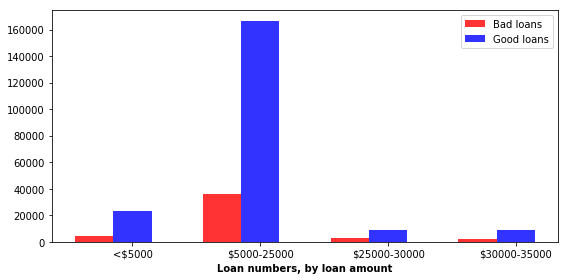

In [13]:
#loan amount by loan status
ls = pd.read_csv("output/loan-status-amount.csv")
ls = ls.reindex(index = [3, 2, 0, 1, 7, 6, 4, 5])

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_grade = ls["loans"].drop_duplicates()
y_bad = ls[ls["loan_status"] == "Charged Off"]["total"]
y_good = ls[ls["loan_status"] == "Fully Paid"]["total"]

# Set position of bar on X axis
r1 = np.arange(len(x_grade))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
plt.bar(r2, y_good, color="b", alpha=0.8, width=barWidth, label="Good loans")
 
# Add xticks on the middle of the group bars
plt.xlabel("Loan numbers, by loan amount", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(x_grade))], ["<$5000", "$5000-25000", "$25000-30000", "$30000-35000"])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

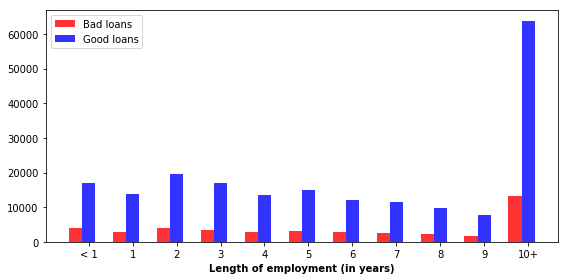

In [14]:
#employment length by loan type
el = pd.read_csv("output/employment-loan.csv")
el = el.reindex(index = [10, 0, 2, 3, 4, 5, 6, 7, 8, 9, 1, 21, 11, 13, 14, 15, 16, 17, 18, 19, 20, 12])

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_length = el["emp_length"].drop_duplicates()
y_bad = el[el["loan_status"] == "Charged Off"]["number"]
y_good = el[el["loan_status"] == "Fully Paid"]["number"]

# Set position of bar on X axis
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
plt.bar(r2, y_good, color="b", alpha=0.8,width=barWidth, label="Good loans")
 
# Add xticks on the middle of the group bars
plt.xlabel("Length of employment (in years)", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(x_length))], ["< 1", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

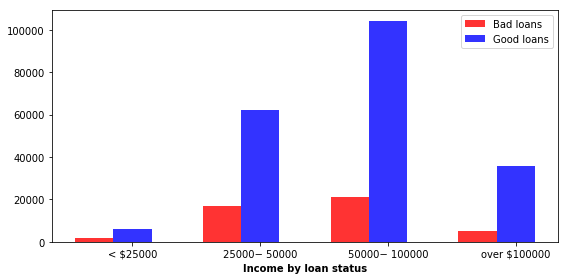

In [15]:
#income by loan type
li = pd.read_csv("output/income-loan.csv")
li = li.reindex(index = [2, 0, 1, 3, 6, 4, 5, 7])

#set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8,4))

#set height of bar
x_length = li["income"].drop_duplicates()
y_bad = li[li["loan_status"] == "Charged Off"]["total"]
y_good = li[li["loan_status"] == "Fully Paid"]["total"]

#set position of bar on X asia
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
plt.bar(r2, y_good, color="b", alpha=0.8, width=barWidth, label="Good loans")
 
# Add xticks on the middle of the group bars
plt.xlabel("Income by loan status", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(x_length))], ["< $25000", "25000− 50000", "50000− 100000", "over $100000"])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

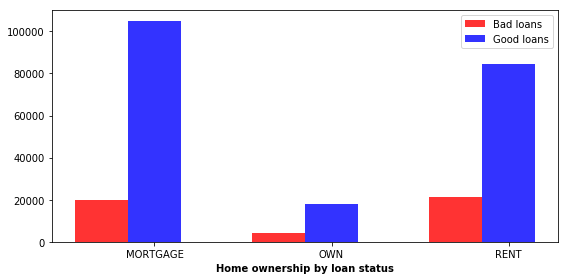

In [16]:
#home ownership by loan type
lh = pd.read_csv("output/home-loan.csv")

# set width of bar
barWidth = 0.3
fig = plt.figure(figsize=(8, 4))

# set height of bar
x_length = lh["home_ownership"].drop_duplicates()
y_bad = lh[lh["loan_status"] == "Charged Off"]["total"]
y_good = lh[lh["loan_status"] == "Fully Paid"]["total"]

# Set position of bar on X axis
r1 = np.arange(len(x_length))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
plt.bar(r2, y_good, color="b", alpha=0.8, width=barWidth, label="Good loans")
 
# Add xticks on the middle of the group bars
plt.xlabel("Home ownership by loan status", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(x_length))], ["MORTGAGE", "OWN", "RENT"])
 
# Create legend & Show graphic
plt.legend()
fig.tight_layout()
plt.show()

In [18]:
#installment by loan type
# inst = pd.read_csv("output/loan-installment.csv")
# inst
# inst = inst.reindex( index = [3, 0, 1, 2, 4, 8, 5, 6, 7, 9])

# #set width of bar
# barWidth = 0.3
# fig = plt.figure(figsize=(10,8))

# #set height of bar
# x_length = inst["instal_amt"]
# y_bad = inst[inst["loan_status"] == "Charged Off"]["total"]
# y_good = inst[inst["loan_status"] == "Fully Paid"]["total"]

# #set position of bar on X asia
# r1 = np.arange(len(x_length))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# # Make the plot
# plt.bar(r1, y_bad, color="r", alpha=0.8, width=barWidth, label="Bad loans")
# plt.bar(r2, y_good, color="b", alpha=0.8, width=barWidth, label="Good loans")
 
# # Add xticks on the middle of the group bars
# plt.xlabel("Installment by loan status", fontweight="bold")
# plt.xticks([r + barWidth for r in range(len(x_length))], ["< $25000", "$25000− 50000", "$50000− 100000", "over $100000"])
 
# # Create legend & Show graphic
# plt.legend()
# fig.tight_layout()
# plt.show()

,instal_amt,total,loan_status
0,$250 - $500,19631,Charged Off
1,$500 - $750,10163,Charged Off
2,$750 - $1000,3896,Charged Off
3,< $250,10155,Charged Off
4,over $1000,1403,Charged Off
5,$250 - $500,88509,Fully Paid
6,$500 - $750,40555,Fully Paid
7,$750 - $1000,15140,Fully Paid
8,< $250,57603,Fully Paid
9,over $1000,5917,Fully Paid


In [ ]:
# import sqlite3

# # Create your connection.
# pat = 'C:\\Users\\maniesha\\Downloads\\lending-club-loan-data\\'
# database = pat + 'database.sqlite'
# conn = sqlite3.connect(database)
# print("Connection Successful",conn)
# df = pd.read_sql('SELECT * FROM loan', conn, chunksize=400000)
# df

In [19]:
df = pd.read_csv("data/loan.csv",low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [26]:
#drop columns that are not relevant
# df = df.drop(['inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m'], axis=1)

KeyError: "['inq_last_12m' 'total_cu_tl' 'inq_fi' 'total_rev_hi_lim' 'all_util'\n 'max_bal_bc' 'open_rv_24m' 'open_rv_12m' 'il_util' 'total_bal_il'\n 'mths_since_rcnt_il' 'open_il_24m' 'open_il_12m' 'open_il_6m'] not found in axis"

In [ ]:
# import seaborn as sns

# df = pd.read_csv("data/loan.csv",low_memory=False)

# plt.figure(figsize=(40,40)) 
# # play with the figsize until the plot is big enough to plot all the columns
# # of your dataset, or the way you desire it to look like otherwise

# sns.heatmap(df.corr())